In [13]:
# regression-dataset-comparison.ipynb

# Required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import (LinearRegression, Lasso, Ridge, ElasticNet, BayesianRidge)
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor

In [14]:
# Load datasets from local files
dataset_paths = {
    "Linear Regression": r"..\data\Linear_Regression.csv",
    "Polynomial Regression (deg=2)": r"..\data\Polynomial_Regression_deg2.csv",
    "Decision Tree": r"..\data\Decision_Tree.csv",
    "SVR (RBF Kernel)": r"..\data\KNN_k5.csv",
    "KNN (k=5)": r"..\data\SVR_RBF_Kernel.csv",
}

In [15]:
# Models to compare
models = {
    "Linear Regression": LinearRegression(),
    #"Lasso (L1) Regression": Lasso(alpha=0.1),
    #"Ridge (L2) Regression": Ridge(alpha=1.0),
    "Elastic Net": ElasticNet(alpha=0.1, l1_ratio=0.5),
    #"Bayesian Ridge": BayesianRidge(),
    "SVR (Linear Kernel)": SVR(kernel='linear', C=1.0),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    #"Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    #"XGBoost": xgb.XGBRegressor(n_estimators=100, random_state=42, verbosity=0),
    #"LightGBM": lgb.LGBMRegressor(n_estimators=100, random_state=42),
    #"CatBoost": CatBoostRegressor(verbose=0, random_state=42),
    "KNN Regression": KNeighborsRegressor(n_neighbors=5)
}

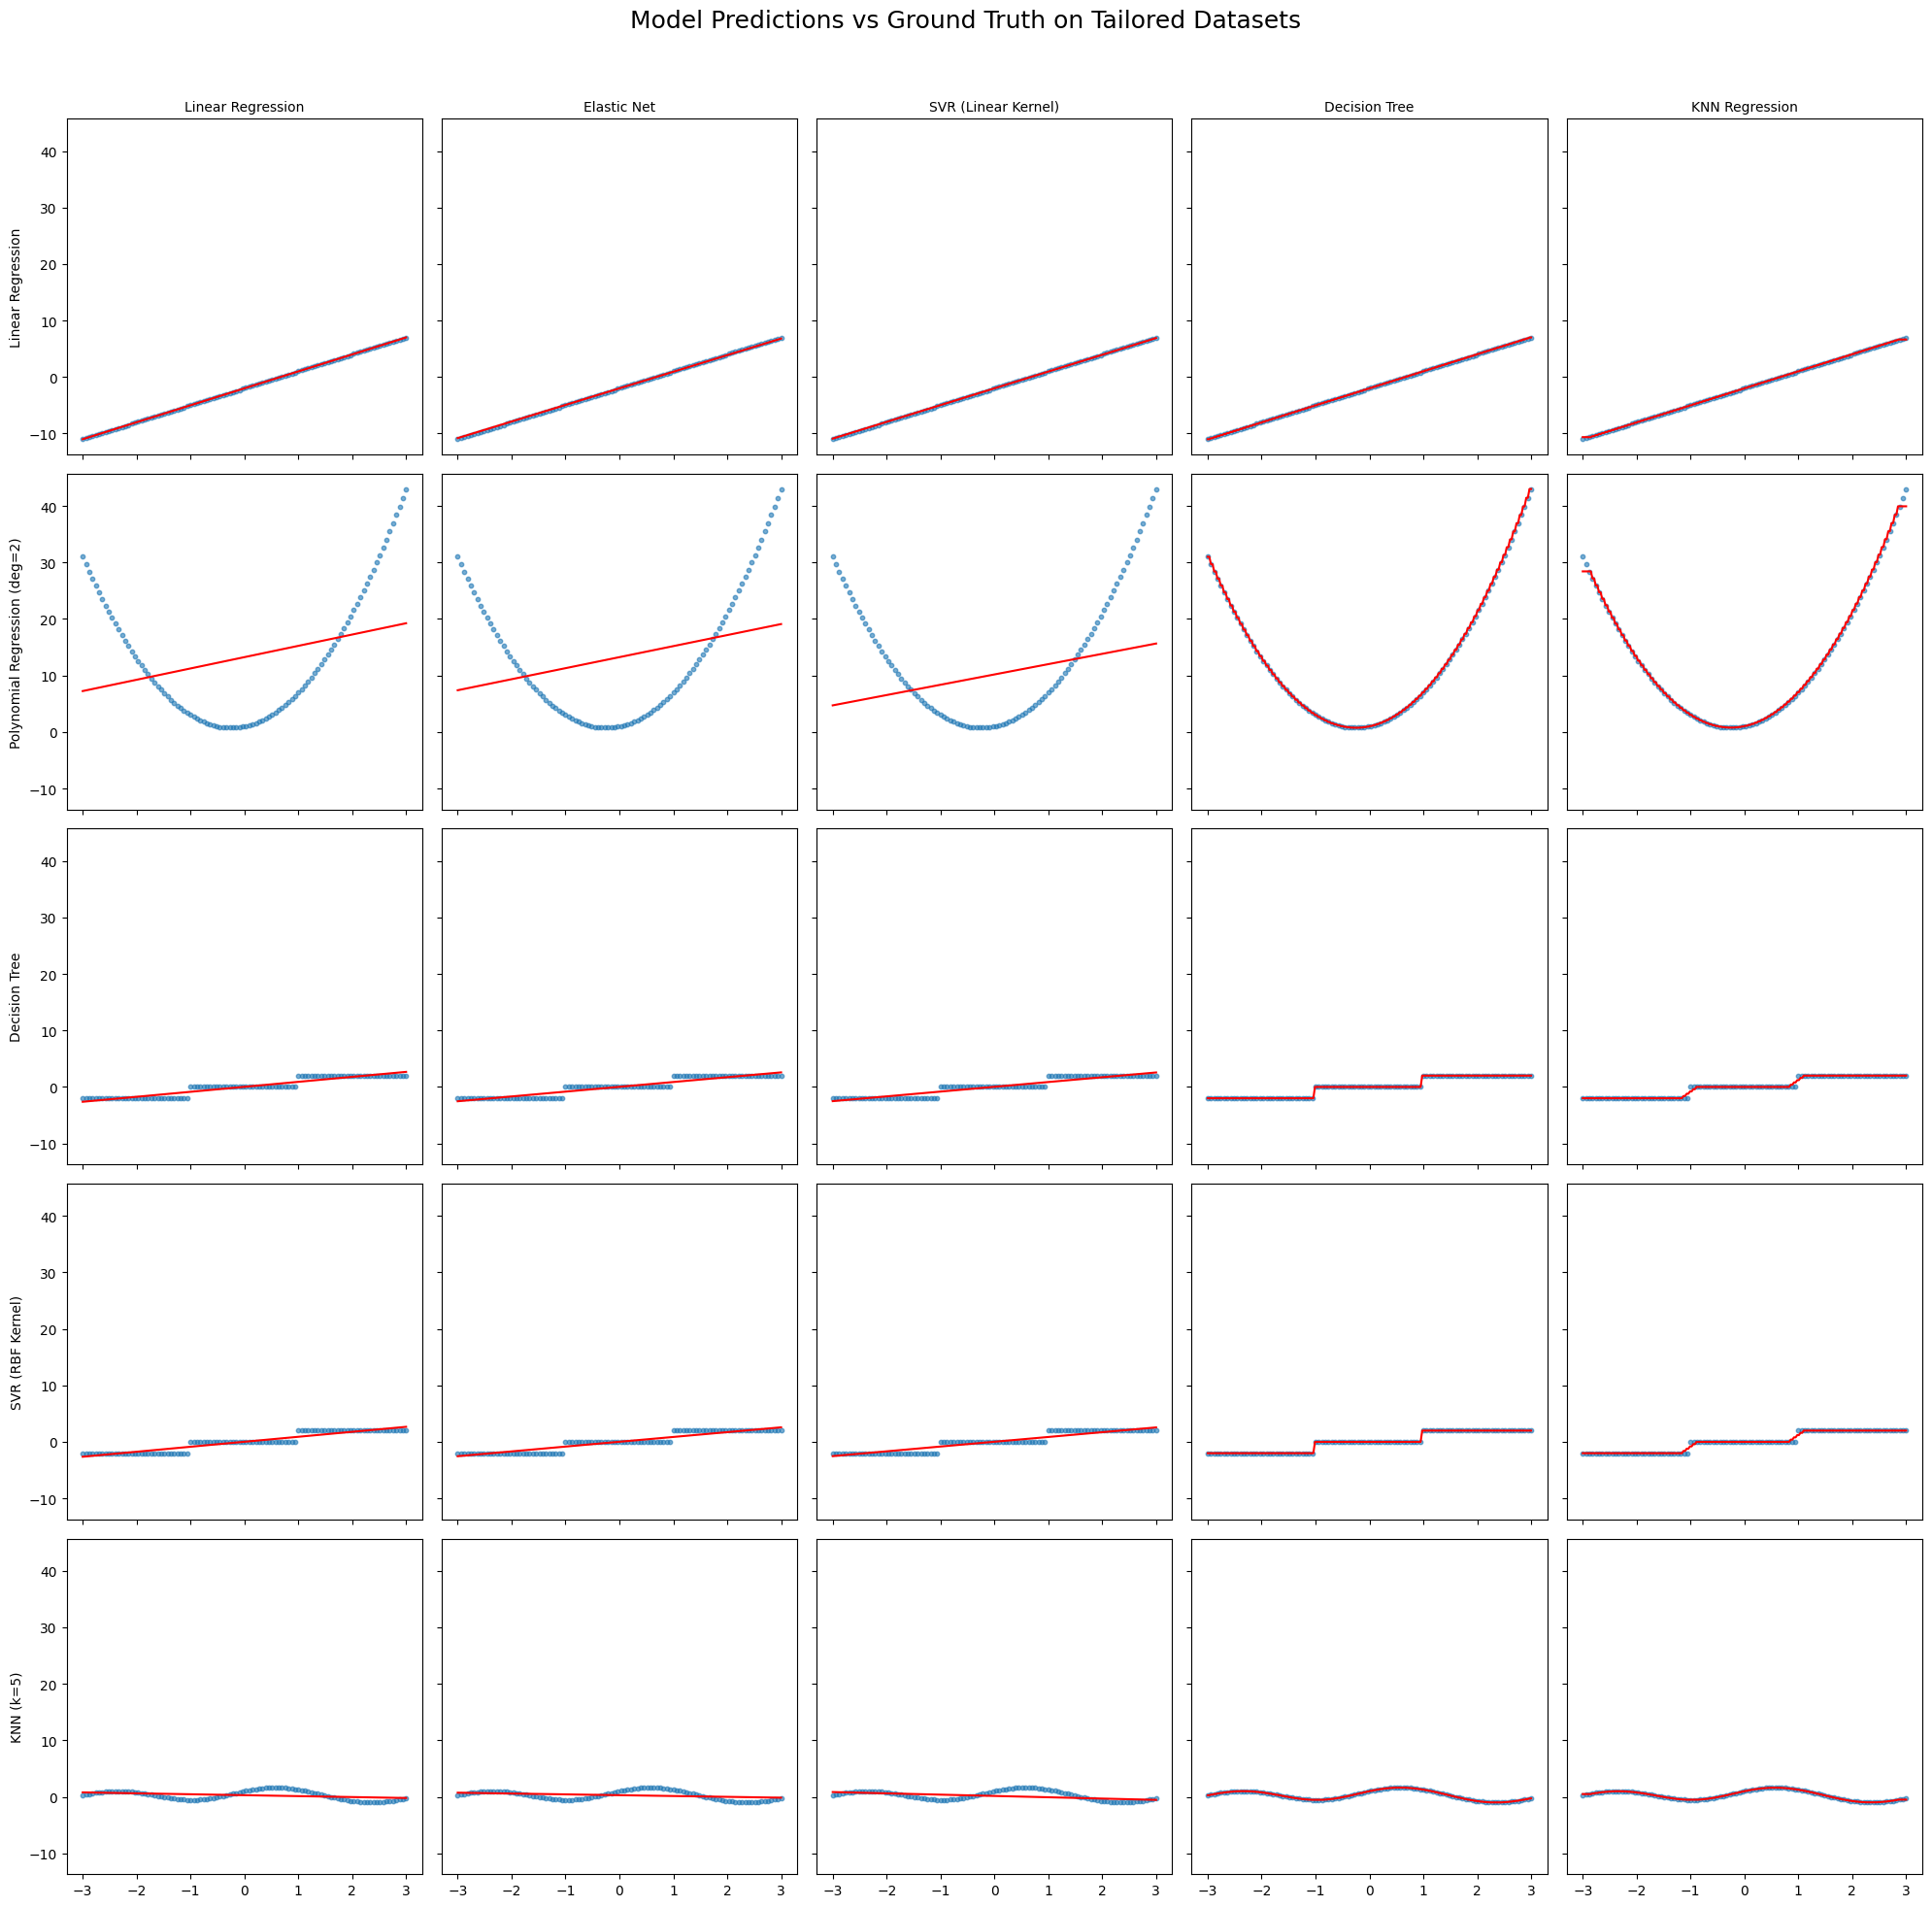

In [16]:
# Create prediction plots
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20), sharex=True, sharey=True)
fig.suptitle("Model Predictions vs Ground Truth on Tailored Datasets", fontsize=18)

X_plot = np.linspace(-3, 3, 200).reshape(-1, 1)

for row_idx, (dataset_name, path) in enumerate(dataset_paths.items()):
    df = pd.read_csv(path)
    X = df[["X"]].values
    y = df["y"].values

    for col_idx, (model_name, model) in enumerate(models.items()):
        ax = axes[row_idx, col_idx]
        model.fit(X, y)
        y_pred = model.predict(X_plot)

        ax.plot(X_plot, y_pred, label='Prediction', color='red')
        ax.scatter(X, y, s=10, label='True', alpha=0.6)
        if row_idx == 0:
            ax.set_title(model_name, fontsize=10)
        if col_idx == 0:
            ax.set_ylabel(dataset_name, fontsize=10)
        ax.label_outer()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

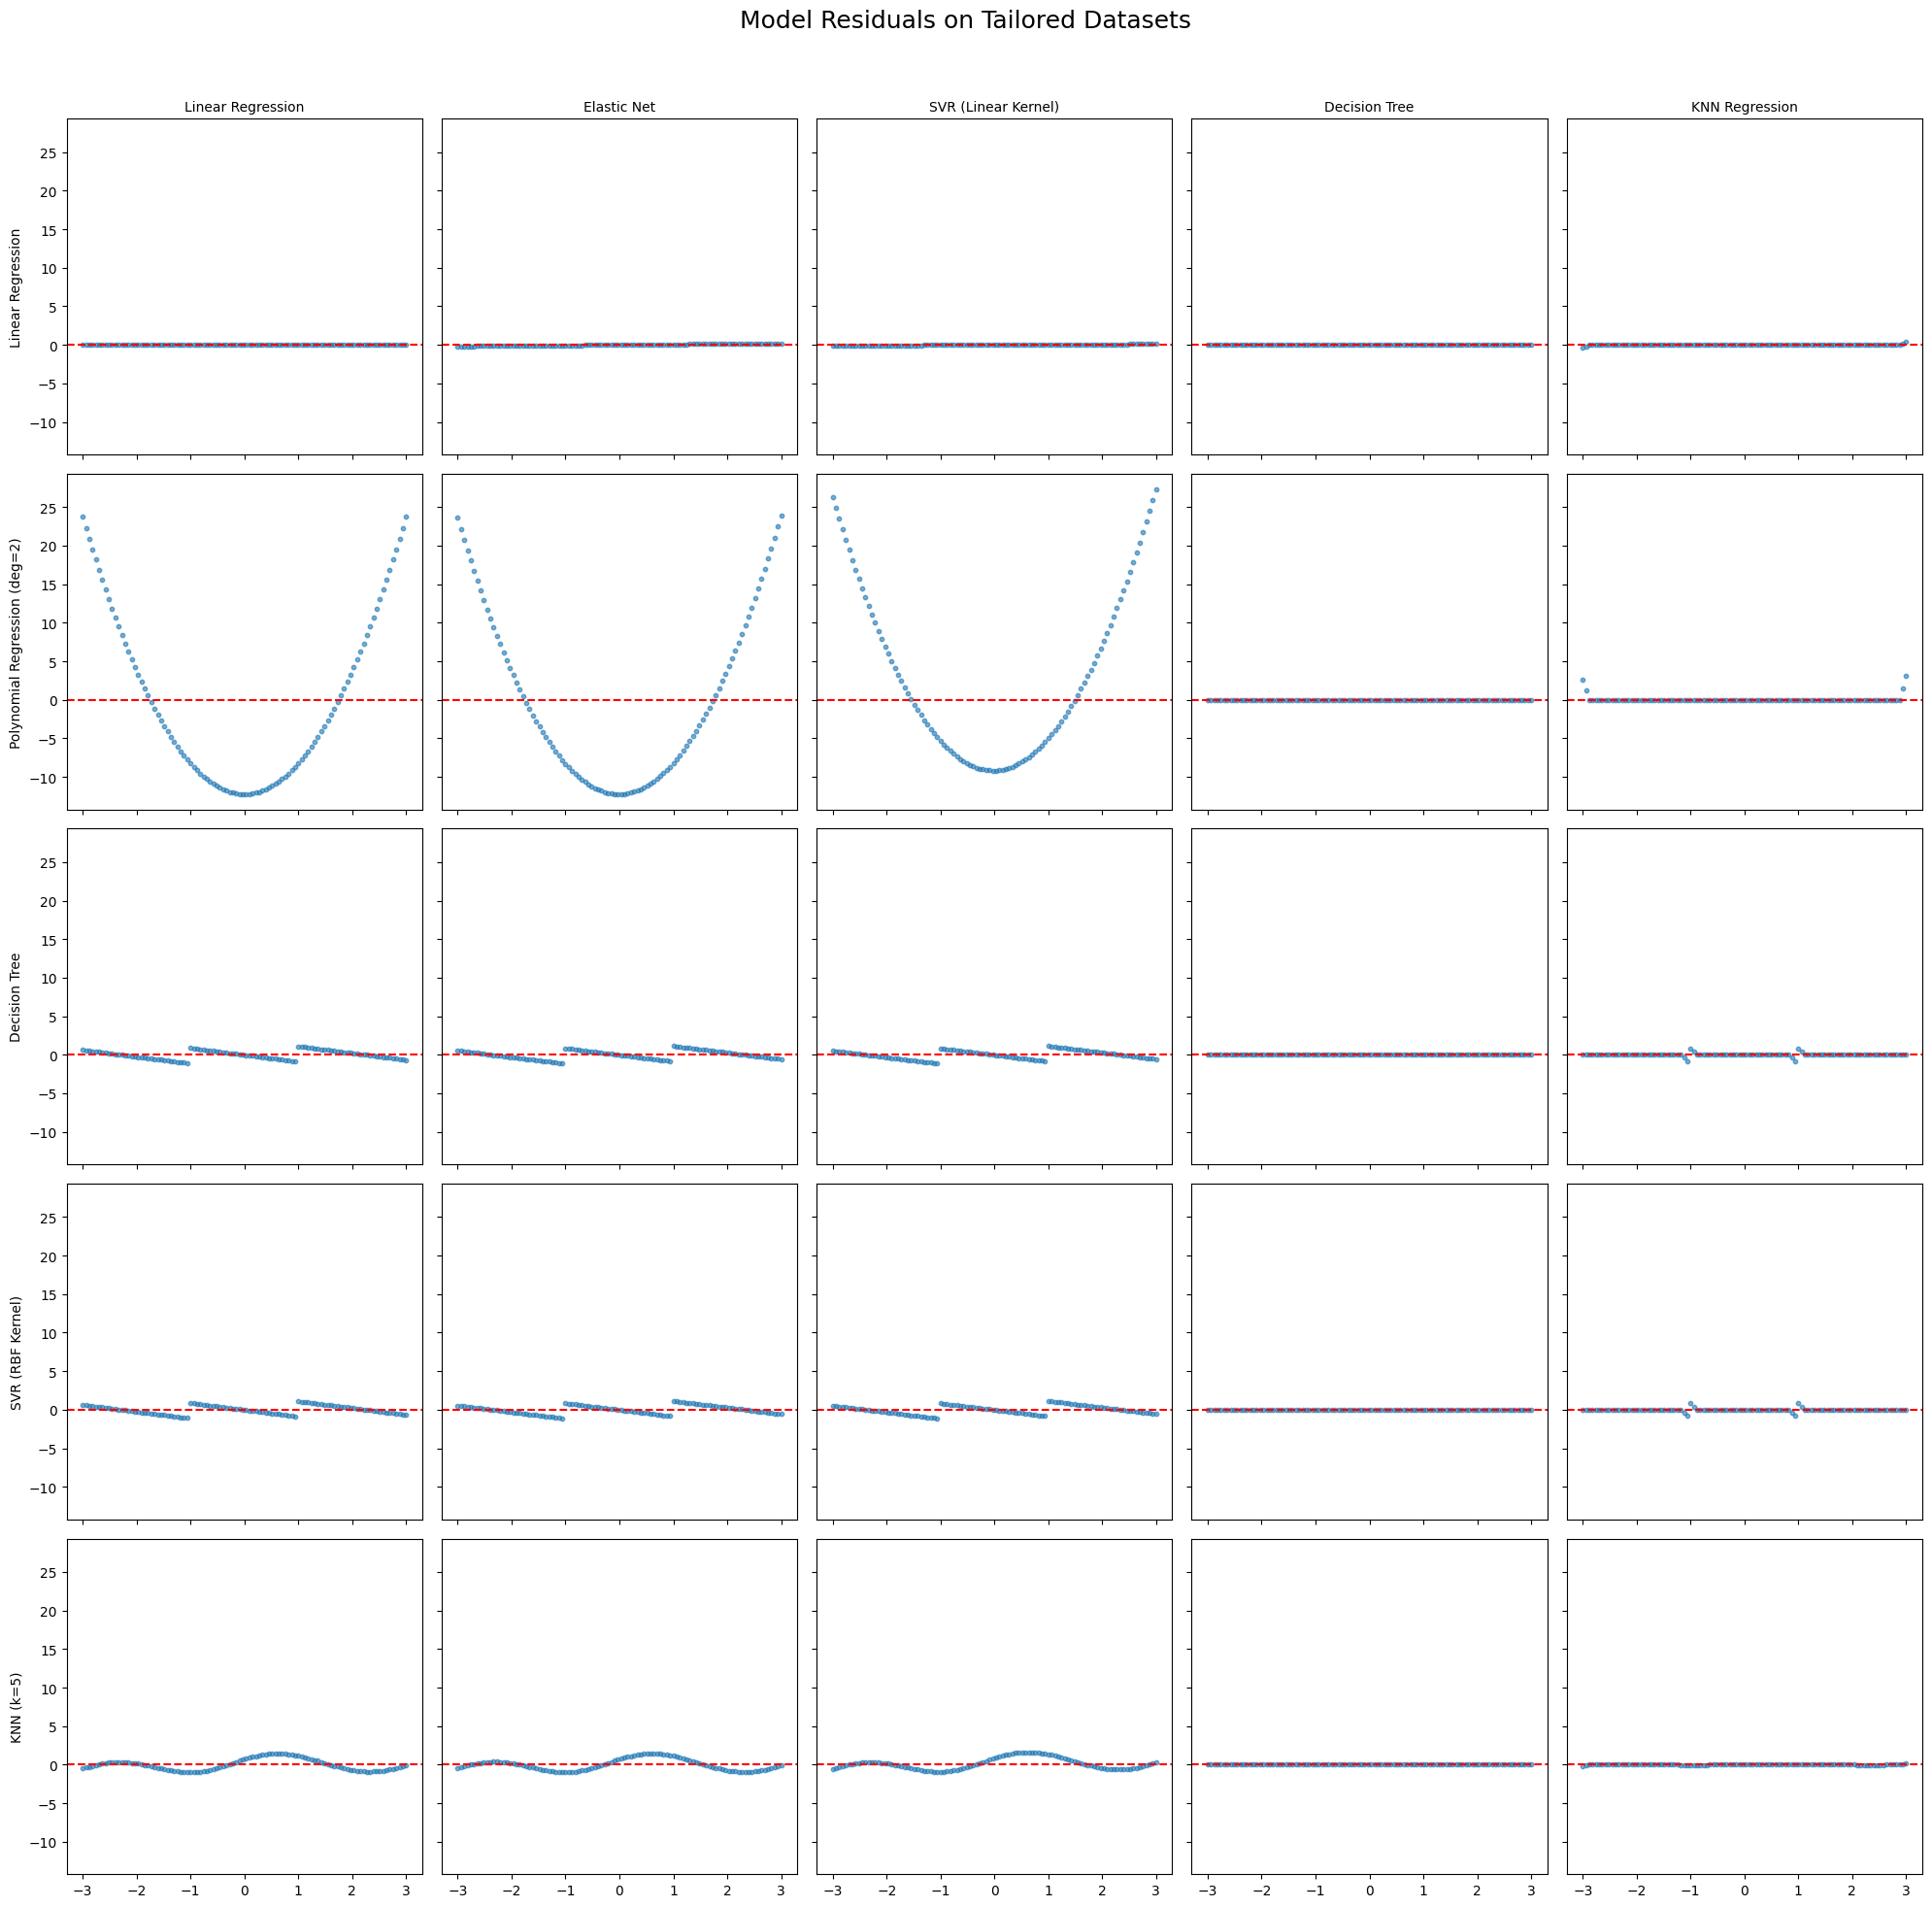

In [17]:
# Create residual plots
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20), sharex=True, sharey=True)
fig.suptitle("Model Residuals on Tailored Datasets", fontsize=18)

for row_idx, (dataset_name, path) in enumerate(dataset_paths.items()):
    df = pd.read_csv(path)
    X = df[["X"]].values
    y = df["y"].values

    for col_idx, (model_name, model) in enumerate(models.items()):
        ax = axes[row_idx, col_idx]
        model.fit(X, y)
        y_pred = model.predict(X)
        residuals = y - y_pred

        ax.scatter(X, residuals, s=10, alpha=0.6)
        ax.axhline(0, color='red', linestyle='--')

        if row_idx == 0:
            ax.set_title(model_name, fontsize=10)
        if col_idx == 0:
            ax.set_ylabel(dataset_name, fontsize=10)
        
        ax.label_outer()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [18]:
# Store scores in dictionaries
mse_scores = pd.DataFrame(index=dataset_paths.keys(), columns=models.keys())
r2_scores = pd.DataFrame(index=dataset_paths.keys(), columns=models.keys())

# Calculate scores
for dataset_name, path in dataset_paths.items():
    df = pd.read_csv(path)
    X = df[["X"]].values
    y = df["y"].values

    for model_name, model in models.items():
        model.fit(X, y)
        y_pred = model.predict(X)
        mse_scores.loc[dataset_name, model_name] = mean_squared_error(y, y_pred)
        r2_scores.loc[dataset_name, model_name] = r2_score(y, y_pred)

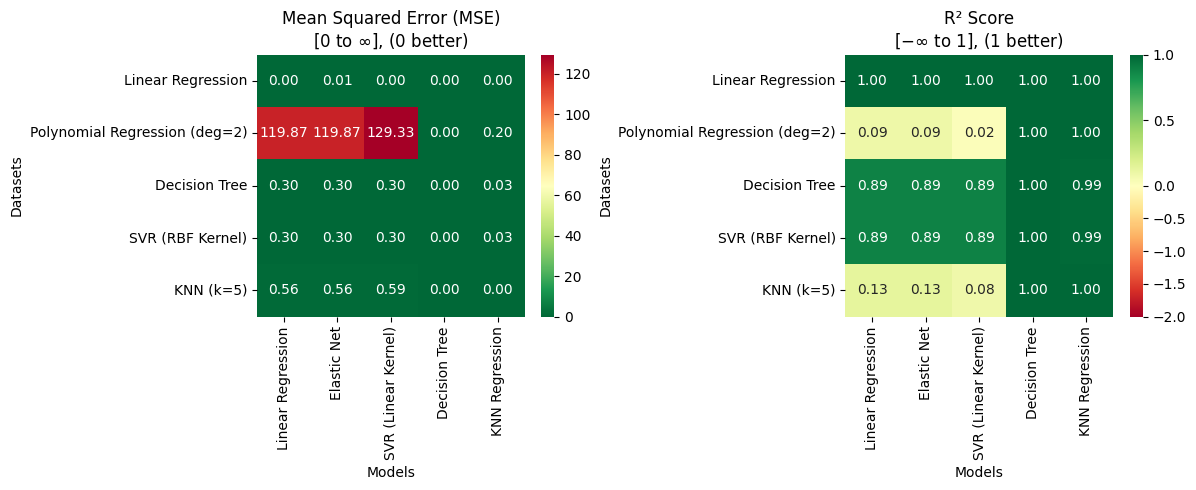

In [19]:
plt.figure(figsize=(12, 5))

# MSE Heatmap
plt.subplot(1, 2, 1)
sns.heatmap(mse_scores.astype(float), annot=True, fmt=".2f", cmap="RdYlGn_r")
plt.title("Mean Squared Error (MSE)\n[0 to $\infty$], (0 better)")
plt.xlabel("Models")
plt.ylabel("Datasets")

# R² Score Heatmap
plt.subplot(1, 2, 2)
norm = TwoSlopeNorm(vmin=-2, vcenter=0, vmax=1)
sns.heatmap(r2_scores.astype(float), annot=True, fmt=".2f", cmap="RdYlGn", norm=norm)
plt.title("R² Score\n[$-\infty$ to 1], (1 better)")
plt.xlabel("Models")
plt.ylabel("Datasets")

plt.tight_layout()
plt.show()
